In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./processed_data.csv")
df

,aid,name,gender,age,occupation,income,marital_status,credit_score,home,child,...,Car Insurance,Home Insurance,Stocks Investments,Bonds,Real-Estates,Commodities,Retirement Policy,Child Policy,Term Policy,Endowment Policy
0,120,Riya,Male,20,Student,1210.00000,Single,5.9,0,0,...,1,0,1,1,0,0,0,0,1,1
1,121,Ananya,Others,20,Student,0.00000,Single,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,122,Rohan,Others,25,Student,38726.00000,Single,4.5,0,0,...,0,0,1,0,0,0,0,0,1,0
3,123,Rohan,Female,19,Student,0.00000,Single,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,124,Lassi,Male,18,Student,0.00000,Single,6.2,0,0,...,0,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27111,30113,Rahul,Male,30,Student,3235.16738,Single,2.0,0,0,...,1,0,0,1,0,0,0,0,1,1
27112,30114,Rishi,Others,48,Business,56640.61048,Single,0.3,0,2,...,0,0,1,1,0,1,0,1,1,0
27113,30116,Kavya,Female,37,Job,75110.79012,Single,3.0,1,0,...,1,1,1,1,1,1,0,0,1,0
27114,30117,Samarth,Others,38,Retired,21570.72990,Married,0.7,0,1,...,0,0,0,1,0,0,1,1,0,0


In [4]:
Q1 = df["child"].quantile(0.25)
Q3 = df["child"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = df[(df['child'] < lower_bound) | (df['child'] > upper_bound)].index

df = df.drop(outlier_indices)
df.shape

(26324, 35)

In [5]:
Q1 = df["income"].quantile(0.25)
Q3 = df["income"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = df[(df['income'] < lower_bound) | (df['income'] > upper_bound)].index

df = df.drop(outlier_indices)
df.shape

(26294, 35)

In [6]:
df['child'] = df['child'].apply(lambda x: 0 if x == 0 else 1)
df['vehicle'] = df['vehicle'].apply(lambda x: 0 if x == 0 else 1)
df['home'] = df['home'].apply(lambda x: 0 if x == 0 else 1)

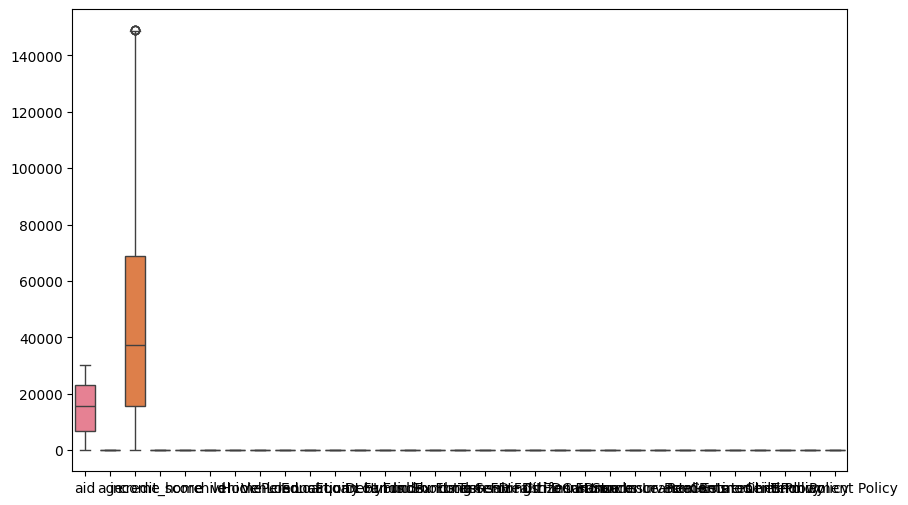

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.show()

In [49]:
df.loc[(df['child'] == 0) | (~df['occupation'].str.contains('student', case=False)), 'Education Loan'] = 0

In [50]:
df.loc[df['occupation'].str.contains('Student|Retired|Job', case=False), 'Debt Funds'] = 0

In [51]:
condition = df["vehicle"] == 1
df.loc[condition, ["Car Insurance"]] = 1
df.loc[condition, ["Vehicle Loan"]] = 0

condition = df["vehicle"] == 0
df.loc[condition, ["Car Insurance"]] = 0
df.loc[condition, ["Vehicle Loan"]] = 1

In [52]:
condition = df["home"] == 1
df.loc[condition, ["Home Insurance"]] = 1
df.loc[condition, ["Home Loan"]] = 0

condition = df["home"] == 0
df.loc[condition, ["Home Insurance"]] = 0
df.loc[condition, ["Home Loan"]] = 1

In [53]:
df['Tax-savings FD'] = df['income'].apply(lambda x: 1 if x > 25000 else 0)

In [54]:
df['Senior Citizen FD'] = df['age'].apply(lambda x: 1 if x > 60 else 0)

In [55]:
condition = (df['child'] == 1) & (df['occupation'].isin(['Job', 'Business']))
df.loc[condition, 'Child Policy'] = 1

condition = df["child"] == 0
df.loc[condition, ["Child Policy"]] = 0

In [56]:
df.loc[(df['child'] == 1) & (df['occupation'] != 'Retired'), 'Child Policy'] = 1
df.loc[(df['child'] == 1) & (df['occupation'] == 'Retired'), 'Child Policy'] = 0

In [57]:
df.loc[(df['age'] < 18) | (df['age'] > 65), 'Term Policy'] = 0

In [58]:
df = df.sample(frac=1, random_state=1).reset_index(drop=True)

In [59]:
condition = df['occupation'] == 'Retired'
df.loc[condition, ["Home Loan","Vehicle Loan","Education Loan","Life Insurance", "Child Policy","Term Policy"]] = 0
df.loc[condition, ["Senior Citizen FD","Retirement Policy"]] = 1

In [83]:
condition = df['occupation'] == 'Student'
df.loc[condition, ['home', 'child', 'Home Loan',"Vehicle Loan", 'Personal Loan','Equity Funds','Debt Funds','Hybrid Funds',"Tax-savings FD","Senior Citizen FD","Home Insurance","Real-Estates","Commodities","Retirement Policy", "Child Policy"]] = 0
df.loc[condition, ["Education Loan"]] = 1
df.shape

(26294, 35)

In [61]:
# occupations_to_remove = ['Accountant', 'Architect','Artist','Consultant','Doctor','Engineer','Lawyer', 'Marketing Manager', 'Nurse', 'Software Developer', 'Teacher']

# df = df[~df['occupation'].isin(occupations_to_remove)]

In [62]:
# marital_status_to_remove = ['Widowed']

# df = df[~df['marital_status'].isin(marital_status_to_remove)]
# df.shape

In [63]:
# df.to_csv('processed_data2.csv', index=False)

In [84]:
X = df[['gender', 'age', 'occupation', 'income', 'marital_status', 'credit_score', 'home', 'child', 'vehicle']]


In [85]:
X = pd.get_dummies(X, columns=['occupation'], dtype=float)
X = pd.get_dummies(X, columns=['marital_status'], dtype=float)
X = pd.get_dummies(X, columns=['gender'], dtype=float)


In [86]:
y = df.drop(["aid","name", 'gender', 'age', 'occupation', 'income', 'marital_status', 'credit_score', 'home', 'child', 'vehicle'],axis =1)
y = y.astype(float)

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle= True)

In [68]:
# X_train.to_csv('feature_data.csv', index=False)

In [88]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [89]:
X_train

array([[ 1.3645931 ,  0.27512399, -0.42160054, ..., -0.72473037,
        -0.70296152,  1.44144344],
       [-1.02972169,  0.69968818,  0.79418933, ..., -0.72473037,
        -0.70296152,  1.44144344],
       [-1.50858465,  0.91344312, -1.45994648, ...,  1.37982351,
        -0.70296152, -0.69374904],
       ...,
       [-1.37176666, -1.16055316,  0.89839989, ...,  1.37982351,
        -0.70296152, -0.69374904],
       [ 1.09095712, -0.27774202,  0.86366303, ..., -0.72473037,
         1.42255298, -0.69374904],
       [-0.41404074, -0.34130399, -1.32475873, ..., -0.72473037,
        -0.70296152,  1.44144344]])

Model 1

In [37]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')
])



In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model 2

In [90]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(16,)),


    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(24, activation='sigmoid')
])


In [91]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [92]:
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 24)                  │             792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,296 (196.47 KB)

 Trainable params: 49,336 (192.72 KB)

 Non-trainable params: 960 (3.75 KB)

In [93]:
history = model.fit(X_train, y_train, epochs=100, shuffle=True, batch_size=32, verbose=0)


In [94]:
y_pred_proba = model.predict(X_test)

y_pred = (y_pred_proba > 0.5).astype(int)

overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Overall Accuracy: 0.0014


In [95]:
accuracies = []
for i, col in enumerate(y.columns):
    acc = accuracy_score(y_test[col], y_pred[:, i])
    accuracies.append(acc)
    print(f"Accuracy for {col}: {acc:.4f}")

mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy: {mean_accuracy:.4f}")

Accuracy for Home Loan: 1.0000
Accuracy for Vehicle Loan: 1.0000
Accuracy for Personal Loan: 0.6466
Accuracy for Education Loan: 1.0000
Accuracy for Equity Funds: 0.6385
Accuracy for Debt Funds: 0.9011
Accuracy for Hybrid Funds: 0.6290
Accuracy for Index Funds: 0.6458
Accuracy for Short-term FD: 0.5011
Accuracy for Long-term FD: 0.5034
Accuracy for Tax-savings FD: 0.9810
Accuracy for Senior Citizen FD: 0.9929
Accuracy for Health Insurance: 0.5487
Accuracy for Life Insurance: 0.6398
Accuracy for Car Insurance: 1.0000
Accuracy for Home Insurance: 1.0000
Accuracy for Stocks Investments: 0.4994
Accuracy for Bonds: 0.4974
Accuracy for Real-Estates: 0.6411
Accuracy for Commodities: 0.6315
Accuracy for Retirement Policy: 0.7716
Accuracy for Child Policy: 1.0000
Accuracy for Term Policy: 0.9379
Accuracy for Endowment Policy: 0.5017
Mean Accuracy: 0.7545


In [77]:
custom_data = pd.DataFrame({
    'age': [24],
    'income': [0],
    'credit_score': [5],
    'home': [0],
    'child': [0],
    'vehicle': [0],
    'occupation_Business': [0],
    'occupation_Job': [0],
    'occupation_Retired': [0],
    'occupation_Student': [1],
    'marital_status_Divorced': [0],
    'marital_status_Married': [0],
    'marital_status_Single': [1],
    'gender_Female': [0],
    'gender_Male': [1],
    'gender_Others': [0],
})

In [78]:

# for col in X.columns:
#     if col not in custom_data.columns:
#         custom_data[col] = 0

In [79]:
# custom_data = scaler.transform(custom_data[X.columns])
# custom_data

In [80]:
custom_pred_proba = model.predict(custom_data[X.columns])
custom_pred_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


array([[4.7676239e-22, 9.0219504e-07, 6.0064107e-01, 1.5762697e-11,
        4.4019866e-01, 7.0859509e-04, 4.8452243e-01, 5.4608655e-01,
        5.2421641e-01, 5.3468949e-01, 9.8739058e-01, 1.0000000e+00,
        4.3967980e-01, 3.9077330e-01, 1.0000000e+00, 1.0000000e+00,
        4.3482289e-01, 4.7785220e-01, 4.6268103e-01, 6.0322434e-01,
        5.7450569e-01, 1.0000000e+00, 1.1995119e-05, 5.5201745e-01]],
      dtype=float32)

In [81]:
custom_predictions = {y.columns[i]: prob for i, prob in enumerate(custom_pred_proba[0])}
custom_predictions

{'Home Loan': 4.767624e-22,
 'Vehicle Loan': 9.0219504e-07,
 'Personal Loan': 0.6006411,
 'Education Loan': 1.5762697e-11,
 'Equity Funds': 0.44019866,
 'Debt Funds': 0.0007085951,
 'Hybrid Funds': 0.48452243,
 'Index Funds': 0.54608655,
 'Short-term FD': 0.5242164,
 'Long-term FD': 0.5346895,
 'Tax-savings FD': 0.9873906,
 'Senior Citizen FD': 1.0,
 'Health Insurance': 0.4396798,
 'Life Insurance': 0.3907733,
 'Car Insurance': 1.0,
 'Home Insurance': 1.0,
 'Stocks Investments': 0.4348229,
 'Bonds': 0.4778522,
 'Real-Estates': 0.46268103,
 'Commodities': 0.60322434,
 'Retirement Policy': 0.5745057,
 'Child Policy': 1.0,
 'Term Policy': 1.1995119e-05,
 'Endowment Policy': 0.55201745}

In [82]:


top_5_predictions = sorted(custom_predictions.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 Predictions:")
for scheme, prob in top_5_predictions:
    print(f"{scheme}: {prob:.4f}")

Top 10 Predictions:
Senior Citizen FD: 1.0000
Car Insurance: 1.0000
Home Insurance: 1.0000
Child Policy: 1.0000
Tax-savings FD: 0.9874
Commodities: 0.6032
Personal Loan: 0.6006
Retirement Policy: 0.5745
Endowment Policy: 0.5520
Index Funds: 0.5461


In [185]:
# model.save("model.h5")

In [186]:
# Create a TFLite converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convert the model
tflite_model = converter.convert()

# Save the model to a file
with open('model4.tflite', 'wb') as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmpvqg7h44s'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 16), dtype=tf.float32, name='keras_tensor_46')
Output Type:
  TensorSpec(shape=(None, 24), dtype=tf.float32, name=None)
Captures:
  135010226787200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010297386736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010297394832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010297388672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010297393776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010213840320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010152099936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010297394128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010242349360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010242359920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135010242360448: Te

Scalar

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
data = pd.read_csv('processed_data.csv')


In [ ]:
data['gender'].unique()

array(['Male', 'Female', 'Others'], dtype=object)

In [ ]:
data['marital_status'].unique()

array(['Divorced', 'Single', 'Married'], dtype=object)

In [ ]:
df.to_csv('processed_data.csv', index=False)

In [ ]:
data_cleaned = data.drop(columns=['name'])
data_encoded = pd.get_dummies(data_cleaned, columns=['gender', 'occupation', 'marital_status'])

In [ ]:
features = [
    'age', 'income', 'credit_score', 'home', 'child', 'vehicle',
    'gender_Female', 'gender_Male', 'gender_Others',
    'occupation_Business', 'occupation_Job', 'occupation_Retired', 'occupation_Student',
    'marital_status_Divorced', 'marital_status_Married', 'marital_status_Single'
]


target = [
    'Home Loan', 'Vehicle Loan', 'Personal Loan', 'Education Loan',
    'Equity Funds', 'Debt Funds', 'Hybrid Funds', 'Index Funds',
    'Short-term FD', 'Long-term FD', 'Tax-savings FD', 'Senior Citizen FD',
    'Health Insurance', 'Life Insurance', 'Car Insurance', 'Home Insurance',
    'Stocks Investments', 'Bonds', 'Real-Estates', 'Commodities',
    'Retirement Policy', 'Child Policy', 'Term Policy', 'Endowment Policy'
]

In [ ]:
X = data_encoded[features]
y = data_encoded[target]

In [ ]:
scaler = StandardScaler()
X.loc[:, ['age', 'income', 'credit_score']] = scaler.fit_transform(X[['age', 'income', 'credit_score']])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(n_estimators=200,
                                                       random_state=42))

In [ ]:
# Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = pd.DataFrame({col: (probs[:, 1] > 0.5 if probs.shape[1] > 1 else probs[:, 0] > 0.5).astype(int) for col, probs in zip(target, y_pred_proba)}, index=X_test.index)


In [ ]:
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy:.4f}")

Overall Accuracy: 0.3148


In [ ]:
def get_user_input():
    return pd.DataFrame({
        'age': [18],
        'income': [0],
        'credit_score': [0],
        'home': [0],
        'child': [0],
        'vehicle': [0],
        'gender_Female': [0],
        'gender_Male': [1],
        'gender_Others': [0],
        'occupation_Business': [0],
        'occupation_Job': [0],
        'occupation_Retired': [0],
        'occupation_Student': [1],
        'marital_status_Divorced': [0],
        'marital_status_Married': [0],
        'marital_status_Single': [1]
    }).reindex(columns=features, fill_value=0)


In [ ]:
new_customer = get_user_input()
new_customer.loc[:, ['age', 'income', 'credit_score']] = scaler.transform(new_customer[['age', 'income', 'credit_score']])

In [ ]:
# Predictions for the new customer
predictions_proba = model.predict_proba(new_customer)
recommendations_df = pd.DataFrame({target[i]: proba[0][1] if proba.shape[1] > 1 else proba[0][0] for i, proba in enumerate(predictions_proba)}, index=[0])


In [ ]:
# Top 5 recommendations
top_recommendations = recommendations_df.T.sort_values(by=0, ascending=False).head(10)
print("Top Recommendations:")
print(top_recommendations)

Top Recommendations:
                           0
Home Loan           1.000000
Vehicle Loan        1.000000
Term Policy         1.000000
Life Insurance      1.000000
Health Insurance    1.000000
Education Loan      1.000000
Bonds               0.666440
Endowment Policy    0.323393
Stocks Investments  0.303560
Short-term FD       0.015000


In [ ]:
import numpy as np
accuracies = []
for i, column in enumerate(target):
    accuracy = accuracy_score(y_test[column], y_pred[column])
    accuracies.append(accuracy)

mean_accuracy = np.mean(accuracies)
print(f"Mean Accuracy across all labels: {mean_accuracy:.4f}")

Mean Accuracy across all labels: 0.8028


In [215]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [216]:
custom_data = pd.DataFrame({
    'age': [24],
    'income': [0],
    'credit_score': [5],
    'home': [0],
    'child': [0],
    'vehicle': [0],
    'occupation_Business': [0],
    'occupation_Job': [0],
    'occupation_Retired': [0],
    'occupation_Student': [1],
    'marital_status_Divorced': [0],
    'marital_status_Married': [0],
    'marital_status_Single': [1],
    'gender_Female': [0],
    'gender_Male': [1],
    'gender_Others': [0],
})

In [217]:
custom_data = scaler.transform(custom_data[X.columns])
custom_data

array([[-1.3026995 , -1.26587823, -0.00480438, -0.74686141, -0.90951843,
        -1.25360117, -0.50415635, -0.59288812, -0.60395118,  1.64438353,
        -0.38586076, -0.88525998,  1.14889141, -0.72376355,  1.42099737,
        -0.69393566]])